In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import gmaps
import json
from pprint import pprint

# Resource File (CSV)
five_cities = pd.read_csv("output_data/Top_497.csv")
five_cities.head()

,Unnamed: 0,Restaurant_id,Name,Locality,Address,City,Latitude,Longitude,Price Range,Average Cost for two,User Rating,Rating Text,Votes,all_reviews_count,Cuisines
0,0,15547004,Restaurant Hubert,CBD,"15 Bligh Street, CBD, Sydney",Sydney,-33.865348,151.210624,4,150,4.9,Excellent,589,224,"French, European"
1,1,16558798,Quay,Circular Quay,"Upper Level, Overseas Passenger Terminal 5 Hic...",Sydney,-33.858029,151.209970,4,500,4.9,Excellent,1366,454,Modern Australian
2,2,16559171,Tetsuya's,CBD,"529 Kent Street, CBD, Sydney",Sydney,-33.875143,151.204932,4,440,4.9,Excellent,1235,329,Japanese
3,3,16569454,LuMi Bar & Dining,Pyrmont,"56 Pirrama Road, \tPyrmont, Pyrmont, Sydney",Sydney,-33.867137,151.197517,4,190,4.9,Excellent,452,196,"Italian, Japanese"
4,4,15545439,Manpuku,Chatswood,"226 Victoria Avenue, Chatswood, Sydney",Sydney,-33.794417,151.189542,2,40,4.9,Excellent,486,190,"Japanese, Ramen"


In [80]:
#Reorganising columns so Cuisine is at the end of the dataframe - dropping unnamed.
new_df = five_cities[['Restaurant_id',"Name", "Locality", "Address", "City", "Latitude", "Longitude", "Price Range", 
                      "Average Cost for two", "User Rating", "Rating Text", "Votes", "Cuisines"]]
#Separating Cuisines data by comma and placing the data into new columns
df = pd.concat([new_df, new_df['Cuisines'].str.split(', ', expand=True)], axis=1)
df.columns = ['Restaurant_id',"Name", "Locality", "Address", "City", "Latitude", "Longitude", "Price Range", 
                      "Average Cost for two", "User Rating", "Rating Text", "Votes", "Cuisines", 
              "Cuisine_1","Cuisine_2","Cuisine_3","Cuisine_4","Cuisine_5","Cuisine_6","Cuisine_7","Cuisine_8"]
df

,Restaurant_id,Name,Locality,Address,City,Latitude,Longitude,Price Range,Average Cost for two,User Rating,...,Votes,Cuisines,Cuisine_1,Cuisine_2,Cuisine_3,Cuisine_4,Cuisine_5,Cuisine_6,Cuisine_7,Cuisine_8
0,15547004,Restaurant Hubert,CBD,"15 Bligh Street, CBD, Sydney",Sydney,-33.865348,151.210624,4,150,4.9,...,589,"French, European",French,European,None,None,None,None,None,None
1,16558798,Quay,Circular Quay,"Upper Level, Overseas Passenger Terminal 5 Hic...",Sydney,-33.858029,151.209970,4,500,4.9,...,1366,Modern Australian,Modern Australian,None,None,None,None,None,None,None
2,16559171,Tetsuya's,CBD,"529 Kent Street, CBD, Sydney",Sydney,-33.875143,151.204932,4,440,4.9,...,1235,Japanese,Japanese,None,None,None,None,None,None,None
3,16569454,LuMi Bar & Dining,Pyrmont,"56 Pirrama Road, \tPyrmont, Pyrmont, Sydney",Sydney,-33.867137,151.197517,4,190,4.9,...,452,"Italian, Japanese",Italian,Japanese,None,None,None,None,None,None
4,15545439,Manpuku,Chatswood,"226 Victoria Avenue, Chatswood, Sydney",Sydney,-33.794417,151.189542,2,40,4.9,...,486,"Japanese, Ramen",Japanese,Ramen,None,None,None,None,None,None
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
492,16586992,Jolley's Boathouse,City Centre,"1 Jolleys Lane, City Centre, Adelaide",Adelaide,-34.917011,138.600296,4,120,4.2,...,233,"Seafood, Modern Australian",Seafood,Modern Australian,None,None,None,None,None,None
493,16588907,The Gallery,"Waymouth Street, City Centre","30 Waymouth Street, Adelaide, City Centre, Ade...",Adelaide,-34.925872,138.598311,4,100,4.2,...,166,"Tapas, Bar Food",Tapas,Bar Food,None,None,None,None,None,None
494,16587014,Lenzerheide Restaurant,Kingswood,"146 Belair Road, Kingswood, Adelaide",Adelaide,-34.972047,138.609192,4,120,4.2,...,233,European,European,None,None,None,None,None,None,None
495,16589555,Sukhumvit Soi 38,City Centre,"54 Pulteney Street, Adelaide",Adelaide,-34.923131,138.605479,3,90,4.2,...,145,Thai,Thai,None,None,None,None,None,None,None


In [5]:
#Placing Cuisine_1 the main cuisine in a Dataframe to allow grouping
cuisines1 = df["Cuisine_1"].value_counts()
cuisines1

Japanese             69
Italian              50
Modern Australian    35
Asian                29
Thai                 27
Indian               21
Vietnamese           17
Middle Eastern       16
French               16
Chinese              15
European             15
Burger               12
Bar Food             10
American             10
Greek                10
Spanish               9
Pizza                 9
Seafood               8
Tapas                 8
Sushi                 8
Mediterranean         7
Malaysian             6
Desserts              6
Australian            6
Cafe Food             5
Korean                5
Coffee and Tea        4
Steak                 4
BBQ                   4
Korean BBQ            3
Mexican               3
African               3
Vegetarian            3
Lebanese              3
Latin American        3
Japanese BBQ          3
Bakery                2
Ramen                 2
Healthy Food          2
Turkish               2
Indonesian            2
Fish and Chips  

In [9]:
# Combining similar cuisines together
df = df.replace({"Sushi": "Japanese", "Japanese BBQ": "Japanese", "Ramen" : "Japanese",
                                    "Pizza": "Italian", "Australian": "Modern Australian", 
                                 "Mediterranean" : "European", "European/Mediterranean": "European",
                                    "Greek" : "European", "Spanish" : "Spanish/Tapas", "Tapas" : "Spanish/Tapas",
                 "Burger" : "American/Burger", "American": "American/Burger",  
                 "Korean BBQ":"Korean", "Asian Fusion": "Asian", "Modern European":"European/Mediterranean", "Fast Food":"American/Burger", 
               "Coffee and Tea": "Coffee and Tea/Desserts", "Desserts":"Coffee and Tea/Desserts"
         })

cuisines2 = df["Cuisine_1"].value_counts()
cuisines2

Japanese                   82
Italian                    59
Modern Australian          41
European                   34
Asian                      30
Thai                       27
American/Burger            23
Indian                     21
Vietnamese                 17
Spanish/Tapas              17
Middle Eastern             16
French                     16
Chinese                    15
Bar Food                   10
Coffee and Tea/Desserts    10
Seafood                     8
Korean                      8
Malaysian                   6
Cafe Food                   5
BBQ                         4
Steak                       4
African                     3
Latin American              3
Lebanese                    3
Vegetarian                  3
Mexican                     3
Indonesian                  2
Contemporary                2
Healthy Food                2
Taiwanese                   2
Cantonese                   2
Fish and Chips              2
Turkish                     2
Sandwich  

In [61]:
#Keep the top ten cuisines we are interested in:
final_df = df.loc[(df["Cuisine_1"] == "Japanese") |
                                  (df["Cuisine_1"] == "Asian") |
                                  (df["Cuisine_1"] == "Italian")|
                                   (df["Cuisine_1"] == "Modern Australian") |
                                   (df["Cuisine_1"] == "European") |
                  (df["Cuisine_1"] == "American/Burger") |
                  (df["Cuisine_1"] == "Indian") |
                  (df["Cuisine_1"] == "Vietnamese") |
                  (df["Cuisine_1"] == "Spanish/Tapas") |
                  (df["Cuisine_1"] == "Middle Eastern") 
                                  ]
final_df["Cuisine_1"]

1      Modern Australian
2               Japanese
3                Italian
4               Japanese
5      Modern Australian
             ...        
488              Italian
489             Japanese
493        Spanish/Tapas
494             European
496                Asian
Name: Cuisine_1, Length: 340, dtype: object

In [62]:
city_group = final_df.groupby("City")
cuisine_city = pd.DataFrame(city_group["Cuisine_1"].value_counts())
cuisine_city.columns = ["Count"]
cuisine_city

Count
City      Cuisine_1               
Adelaide  Italian               14
          European              11
          Asian                 10
          Modern Australian      9
          Indian                 8
          American/Burger        5
          Vietnamese             5
          Japanese               4
          Spanish/Tapas          3
          Middle Eastern         2
Brisbane  Japanese              14
          Italian               12
          Indian                 7
          Modern Australian      7
          American/Burger        6
          Asian                  6
          Vietnamese             6
          European               5
          Middle Eastern         4
          Spanish/Tapas          3
Melbourne Japanese              18
          Italian               11
          Modern Australian      8
          Asian                  7
          European               7
          Middle Eastern         7
          Spanish/Tapas          4
          American/Burger        3
          Vietnamese             2
          Indian                 1
Perth     Japanese              21
          Italian               11
          European               8
          American/Burger        6
          Modern Australian      6
          Spanish/Tapas          6
          Asian                  4
          Indian                 4
          Middle Eastern         2
          Vietnamese             2
Sydney    Japanese              25
          Italian               11
          Modern Australian     11
          American/Burger        3
          Asian                  3
          European               3
          Vietnamese             2
          Indian                 1
          Middle Eastern         1
          Spanish/Tapas          1

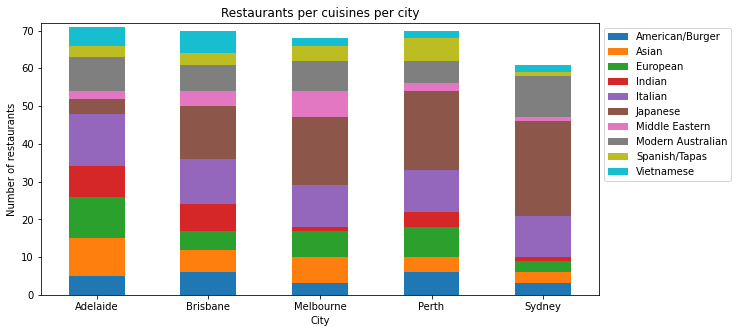

<Figure size 432x288 with 0 Axes>

In [67]:
#Breakdown of restaurants per user ratings across cities
cuisine=final_df.groupby(['City'])['Cuisine_1'].value_counts().unstack('Cuisine_1').fillna(0)
cuisine.plot(kind='bar', stacked=True, legend=False, rot=0, figsize=(10,5)).legend(bbox_to_anchor=(1, 1))
# Set textual properties
plt.title("Restaurants per cuisines per city")
plt.ylabel("Number of restaurants")
plt.xlim(-0.5,len(cuisine)-0.5)
plt.ylim(0,72)
#Save image
plt.savefig('images/Restaurants per cuisines per city.png')
# Show plot
plt.show()
plt.tight_layout()

In [64]:
cuisine_group = final_df.groupby("Cuisine_1")
cities_per_cuisines = pd.DataFrame(cuisine_group["City"].value_counts())
cities_per_cuisines.columns = ["Count"]
cities_per_cuisines

Count
Cuisine_1         City            
American/Burger   Brisbane       6
                  Perth          6
                  Adelaide       5
                  Melbourne      3
                  Sydney         3
Asian             Adelaide      10
                  Melbourne      7
                  Brisbane       6
                  Perth          4
                  Sydney         3
European          Adelaide      11
                  Perth          8
                  Melbourne      7
                  Brisbane       5
                  Sydney         3
Indian            Adelaide       8
                  Brisbane       7
                  Perth          4
                  Melbourne      1
                  Sydney         1
Italian           Adelaide      14
                  Brisbane      12
                  Melbourne     11
                  Perth         11
                  Sydney        11
Japanese          Sydney        25
                  Perth         21
                  Melbourne     18
                  Brisbane      14
                  Adelaide       4
Middle Eastern    Melbourne      7
                  Brisbane       4
                  Adelaide       2
                  Perth          2
                  Sydney         1
Modern Australian Sydney        11
                  Adelaide       9
                  Melbourne      8
                  Brisbane       7
                  Perth          6
Spanish/Tapas     Perth          6
                  Melbourne      4
                  Adelaide       3
                  Brisbane       3
                  Sydney         1
Vietnamese        Brisbane       6
                  Adelaide       5
                  Melbourne      2
                  Perth          2
                  Sydney         2

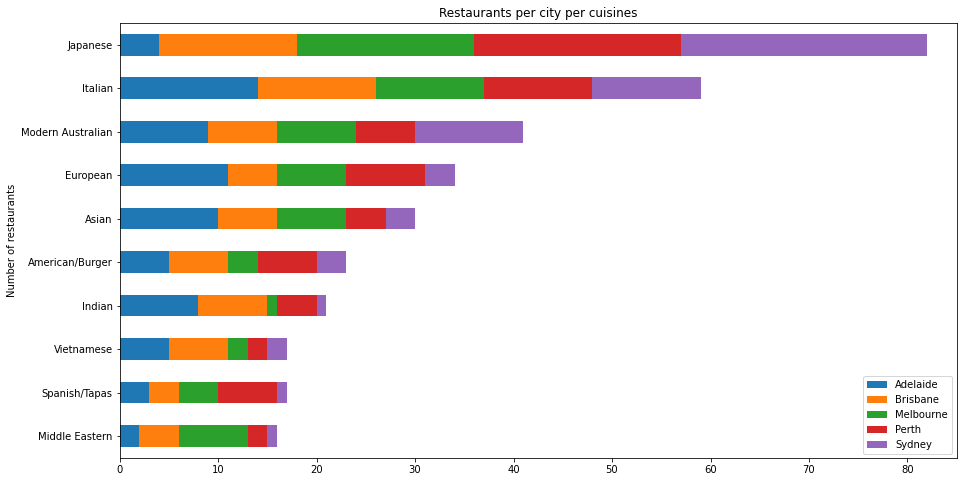

<Figure size 432x288 with 0 Axes>

In [77]:
#Breakdown of restaurants per user ratings across cities
cuisine2=final_df.groupby(['Cuisine_1'])['City'].value_counts().sort_values(ascending=False).unstack('City').fillna(0)
cuisine2['Total'] = cuisine2.apply('sum', axis=1)
cuisine2.sort_values('Total')\
        .drop(columns=['Total'])\
        .plot(kind='barh',stacked=True, legend=False, figsize=(15,8)).legend(bbox_to_anchor=(1, 0.2))

# Set textual properties
plt.title("Restaurants per city per cuisines")
plt.ylabel("Number of restaurants")
plt.ylim(-0.5,len(cuisine2)-0.5)
plt.xlim(0,85)
#Save image
plt.savefig('images/Restaurants per city per cuisines.png')
# Show plot
plt.show()
plt.tight_layout()